## Fast.ai Deep Learning 1 Practice - Tabluar data and models

This notebook is practice for Lesson 4 of the [Fast.ai](https://www.fast.ai) course. It uses a small sample of tabular data.

In [1]:
from fastai.tabular import *

In [4]:
path = Path('/media/veracrypt3/Cloud/Datasets/adult_sample/')

In [5]:
df = pd.read_csv(path/'adult.csv')
dep_var = 'salary'

# categorical names
cat_names = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race']

# continuous names
cont_names = ['age', 'fnlwgt', 'education-num']
procs = [FillMissing, Categorify, Normalize]

In [6]:
test = TabularList.from_df(df.iloc[800:1000].copy(), path=path, cat_names=cat_names, cont_names=cont_names)

In [7]:
data = (TabularList.from_df(df, path=path, cat_names=cat_names, cont_names=cont_names, procs=procs)
                           .split_by_idx(list(range(800,1000)))
                           .label_from_df(cols=dep_var)
                           .add_test(test)
                           .databunch())

In [8]:
data.show_batch(rows=10)

workclass,education,marital-status,occupation,relationship,race,education-num_na,age,fnlwgt,education-num,target
State-gov,Bachelors,Never-married,Prof-specialty,Not-in-family,White,False,-1.0692,0.4096,1.1422,<50k
Private,Bachelors,Separated,Prof-specialty,Not-in-family,White,False,-0.1896,0.7779,1.1422,<50k
Private,Assoc-acdm,Never-married,Other-service,Own-child,White,False,-1.2891,-0.5449,0.7511,<50k
Self-emp-not-inc,Masters,Married-civ-spouse,Exec-managerial,Husband,White,False,-0.2629,0.1167,1.5334,>=50k
Private,Bachelors,Married-civ-spouse,Craft-repair,Husband,White,False,-0.8493,-0.6630,1.1422,<50k
Private,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,False,0.1036,2.4239,-0.4224,>=50k
Private,Some-college,Never-married,Other-service,Not-in-family,White,False,1.1297,-0.4823,-0.0312,<50k
Private,10th,Married-civ-spouse,Machine-op-inspct,Husband,White,False,0.2502,-1.5171,-1.5958,<50k
Private,HS-grad,Never-married,Other-service,Other-relative,White,False,1.4229,-0.7236,-0.4224,<50k
Private,Masters,Married-civ-spouse,Exec-managerial,Husband,White,False,-0.4095,0.0216,1.5334,>=50k


In [9]:
learn = tabular_learner(data, layers=[200, 100], metrics=accuracy)

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


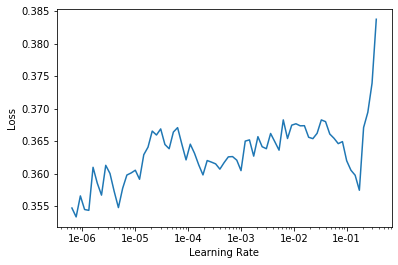

In [11]:
learn.lr_find()
learn.recorder.plot()

In [14]:
learn.fit(3, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.366707,0.389064,0.825000,00:03
1,0.345902,0.384648,0.830000,00:03
2,0.359473,0.369234,0.835000,00:03
